In [1]:
# Module importieren

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from scipy.stats import norm

In [2]:
# Daten in Pd einlesen
data = pd.read_csv("umfragedaten_v1_an-1636985768.csv")

# Data Wrangling - Spaltenauswahl (RAUCH und NETTO)
data = data[["RAUCH", "NETTO"]]
# Ja und Nein Werte zu 1 und 0 aendern
data["RAUCH"] = data["RAUCH"].map({"JA":1, "NEIN":0})
# NaN Werte entfernen
data = data[data["RAUCH"].notna()]
data = data[data["NETTO"].notna()]
data

,RAUCH,NETTO
0,1.0,475.0
1,0.0,780.0
6,0.0,4000.0
7,0.0,400.0
8,0.0,1100.0
...,...,...
3465,0.0,2000.0
3466,1.0,130.0
3467,0.0,1500.0
3469,0.0,1300.0


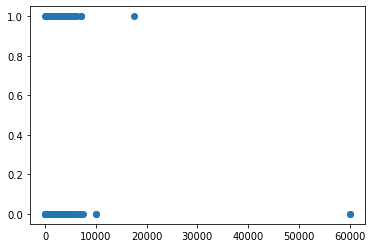

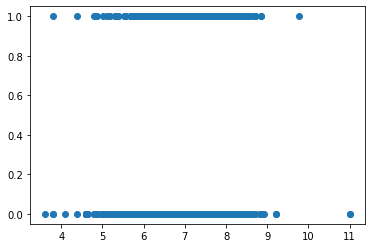

In [3]:
# x und y Achsen definieren
x = data["NETTO"].values.reshape(-1,1)
y = data["RAUCH"].values

# Scatterplot erstellen
plt.scatter(x,y)
plt.show()

# Transofmartion der x Achse
x = np.log(x)
plt.scatter(x, y)
plt.show()

In [4]:
# Trainings und Testdaten erstellen fuer Logistische Regressions Model
train, test = train_test_split(data, test_size = 0.2)

# x_train und y_train
x_train = train["NETTO"].values.reshape(-1,1)
x_train = np.log(x_train)
y_train = train["RAUCH"].values

# x_test und y_test
x_test = test["NETTO"].values.reshape(-1,1)
x_test = np.log(x_test)
y_test = test["RAUCH"].values

In [5]:
# Logistisches Regressions Model erstellen
model = LogisticRegression().fit(x_train, y_train)

In [6]:
# Confusions Matrix und Auswertung
y_test_predict = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_test_predict)
print(conf_matrix)

# Auswertung der Confusion Matrx Variante 1 
true_p, true_n = conf_matrix[0][0], conf_matrix[1][1]
true_predict = true_p + true_n

false_p, false_n = conf_matrix[1][0], conf_matrix[0][1]
false_predict = false_p + false_n

total_predict = true_predict + false_predict
result_prediction1 = true_predict / total_predict
print(result_prediction1)

# Auswertung der Confusion Matrix Variante 2
result_predicition2 = model.score(x_test, y_test)
print(result_predicition2)

[[371   0]
 [172   0]]
0.6832412523020258
0.6832412523020258


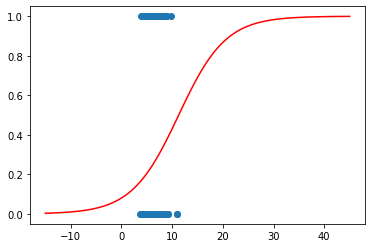

In [7]:
# x_values generieren um model zu plotten
x_values = np.linspace(-15, 45, 100).reshape(-1,1)
y_values = model.predict_proba(x_values)[:,1]

# plotten
plt.scatter(x, y)
plt.plot(x_values, y_values, c = "r")
plt.show()

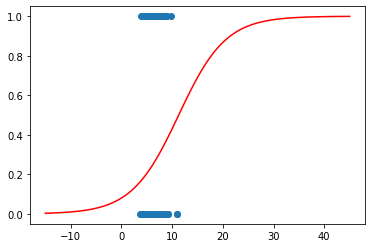

In [8]:
# Funktion der Logistischen Regression ueberpruefen
alpha, beta = model.coef_, model.intercept_
y_values_function = np.exp(beta + alpha * x_values) / (1 + np.exp(beta + alpha * x_values))

# plotten
plt.scatter(x,y)
plt.plot(x_values, y_values_function, c = "r")
plt.show()

In [9]:
# Wahrscheinlichkeit, dass eine Person mit 4000 Gehalt Raucht.
gehalt = [[4000]]
print(model.predict_proba(np.log(gehalt))[:,1][0]*100)

34.331382731576134
